In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


In [14]:
california_house = fetch_california_housing()

In [15]:
x_train_all, x_test, y_train_all, y_test = train_test_split(california_house.data, california_house.target)

In [16]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all)

In [17]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [18]:
sc = StandardScaler()
x_train_norm = sc.fit_transform(x_train)
x_valid_norm = sc.transform(x_valid)
x_test_norm = sc.transform(x_test)

In [19]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1)
])

In [20]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_absolute_error'])

In [21]:
run_model = model.fit(x_train_norm, y_train, epochs=40, validation_data=(x_valid_norm, y_valid))

Epoch 1/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4595 - mean_absolute_error: 0.8473 - val_loss: 2.4284 - val_mean_absolute_error: 0.5406
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6384 - mean_absolute_error: 0.5212 - val_loss: 0.4256 - val_mean_absolute_error: 0.4650
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4318 - mean_absolute_error: 0.4747 - val_loss: 0.3988 - val_mean_absolute_error: 0.4525
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3975 - mean_absolute_error: 0.4522 - val_loss: 0.3802 - val_mean_absolute_error: 0.4388
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3955 - mean_absolute_error: 0.4474 - val_loss: 0.3742 - val_mean_absolute_error: 0.4344
Epoch 6/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3836 - mean_absolute_error: 0.4428 - val_loss: 0.3712 - val_mean_absolute_error: 0.4396
Epoch 7/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3647 - mean_absolute_error: 0.4324 - v

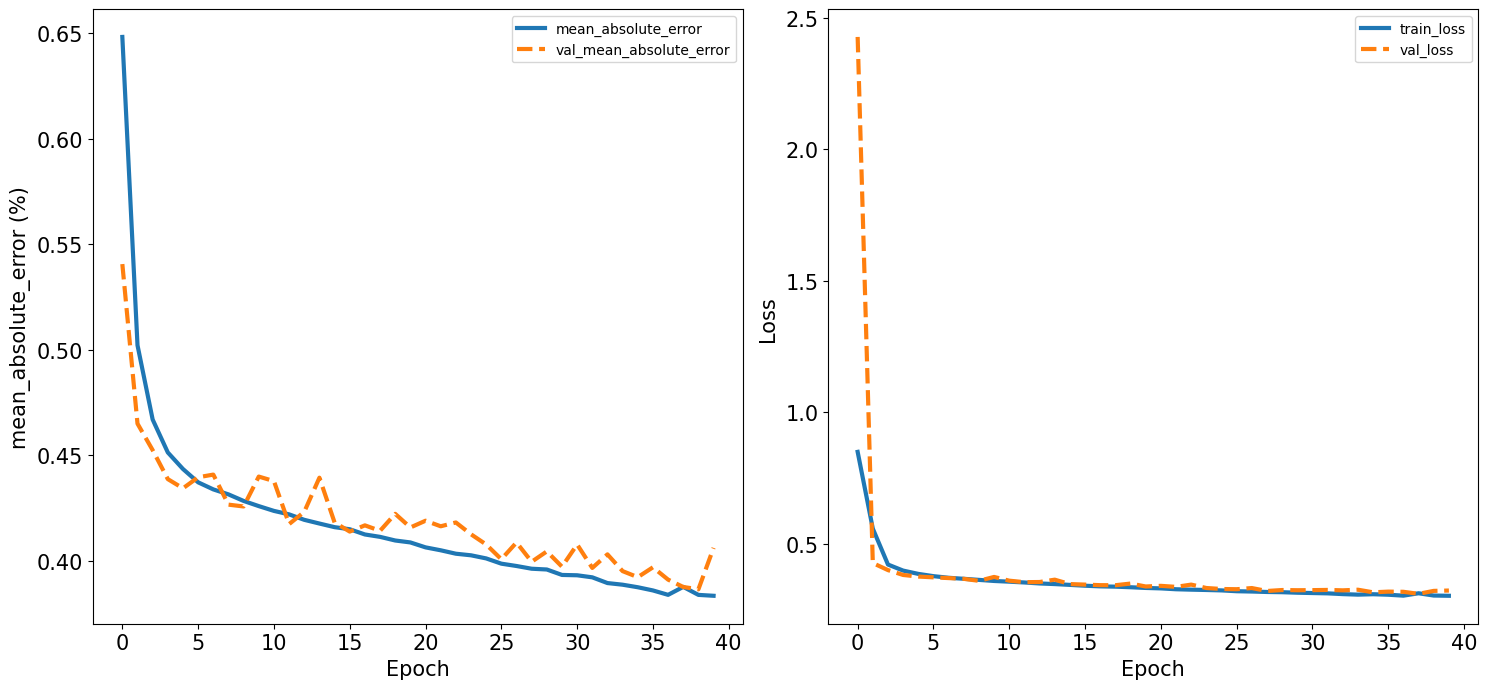

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))  # Adjust figsize as needed
ax1.plot(run_model.history["mean_absolute_error"], label="mean_absolute_error", lw = 3, linestyle ='-')
ax1.plot(run_model.history["val_mean_absolute_error"], label="val_mean_absolute_error", lw = 3, linestyle ='--')
ax1.set_ylabel('mean_absolute_error (%)', fontsize=15)
ax1.set_xlabel('Epoch', fontsize=15)
ax1.legend()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.plot(run_model.history["loss"], label="train_loss", lw = 3, linestyle ='-')
ax2.plot(run_model.history["val_loss"], label="val_loss", lw = 3, linestyle ='--')
ax2.set_ylabel('Loss ', fontsize=15)
ax2.set_xlabel('Epoch', fontsize=15)
ax2.legend()
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()


In [25]:
x_train.shape[1:]

(8,)

In [31]:
input_ = keras.layers.Input(shape = x_train.shape[1:])
hidden1 = keras.layers.Dense(50, activation='relu')(input_)
hidden2 = keras.layers.Dense(10, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [32]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_absolute_error'])

In [33]:
run_model2 = model.fit(x_train_norm, y_train, epochs=40, validation_data=(x_valid_norm, y_valid))

Epoch 1/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.4803 - mean_absolute_error: 0.7982 - val_loss: 4.1744 - val_mean_absolute_error: 0.5546
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7216 - mean_absolute_error: 0.5419 - val_loss: 1.0113 - val_mean_absolute_error: 0.5325
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6172 - mean_absolute_error: 0.6545 - val_loss: 4.1946 - val_mean_absolute_error: 0.5702
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6470 - mean_absolute_error: 0.5349 - val_loss: 111.6528 - val_mean_absolute_error: 0.9092
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6.9168 - mean_absolute_error: 0.8014 - val_loss: 1305.8567 - val_mean_absolute_error: 1.6434
Epoch 6/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan 